**Text Classification -Sentiment Analysis-**

Text Classification is an automated process of classification of text into predefined categories. We can classify Emails into spam or non-spam, news articles into different categories like Politics, Stock Market, Sports, etc.



---

This can be done with the help of Natural Language Processing and different Classification Algorithms like Naive Bayes, SVM and even Neural Networks in Python


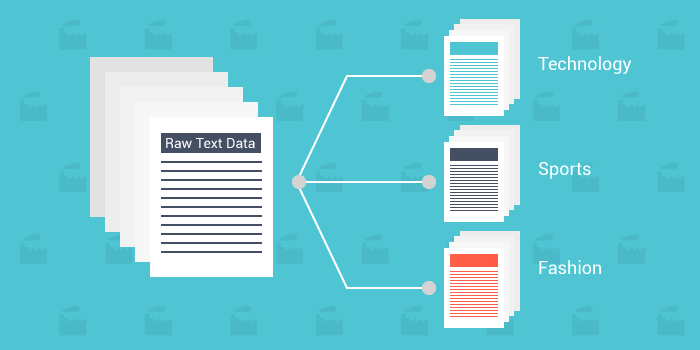

In [ ]:
#download dataset from this link https://github.com/Gunjitbedi/Text-Classification/blob/master/corpus.csv

Add the Required Libraries

In [ ]:
!pip install beautifulsoup4
!pip install urllib3
!pip install pandas
!pip install matplotlib
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
# to guarantee reproducibility you have to set the seed
np.random.seed(500)

## Dataset: Amazon Review Polarity

The Amazon reviews dataset consists of reviews from amazon. The data span a period of 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review.

### Note: 
For demonstration purposes we take only a part of the whole dataset

In [ ]:
!wget --no-check-certificate \
    'https://s3.amazonaws.com/fast-ai-nlp/amazon_review_polarity_csv.tgz' \
    -O './amazon_review_polarity_csv.tgz'

!tar -xzvf './amazon_review_polarity_csv.tgz'

--2021-10-21 09:38:52--  https://s3.amazonaws.com/fast-ai-nlp/amazon_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.184.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.184.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 688339454 (656M) [application/x-tar]
Saving to: ‘./amazon_review_polarity_csv.tgz’

./amazon_review_pol 100%[===================>] 656.45M  48.8MB/s    in 14s     

2021-10-21 09:39:06 (45.9 MB/s) - ‘./amazon_review_polarity_csv.tgz’ saved [688339454/688339454]

amazon_review_polarity_csv/
amazon_review_polarity_csv/train.csv
amazon_review_polarity_csv/readme.txt
amazon_review_polarity_csv/test.csv


In [ ]:
# reading corpus
#Corpus = pd.read_csv('amazon_review_polarity_csv/train.csv', header=None)

Corpus = pd.read_csv('amazon_review_polarity_csv/test.csv', header=None)

Corpus = Corpus.sample(frac=0.05)


print(f' Train shape: {Corpus.shape}')

print(type(Corpus))

 Train shape: (20000, 3)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
Corpus.columns = ['label', 'review_title', 'text']
Corpus.head()

,label,review_title,text
254308,1,Golf Lessons,"Much ado about nothing. Repetitive, self-servi..."
279085,2,cool,hi! I'm from germany. 5 stars because: 1. Real...
398337,2,You can not beat the product anywhere,I take this every day. I have seen the effects...
232193,2,An Excellent CD,"Almost two years ago, I was sent this CD for c..."
316546,1,Zzzzzzzzz for Saturday,I fail to understand all the love for this boo...


## Study Corpus

First of all let's do a little study on the composition of the corpus

In [ ]:
#we count the number of examples and tokens present
corpus_all_in_one = ' '.join([el for el in Corpus.text])

print("Number of examples: {}".format(len(Corpus)))
print("Number of tokens present (char): {}".format(len(corpus_all_in_one)))

Number of examples: 20000
Number of tokens present (char): 8108451


In [ ]:
import nltk

#PunktSentenceTokenizer is a sentence limit detection algorithm (it can be trained) or NLTK already includes a pre-trained version of PunktSentenceTokenizer.

nltk.download('punkt')

from nltk.tokenize import word_tokenize

try: 
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

print("Total number of tokens: {}".format(len(all_tokens)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total number of tokens: 1698952


In [ ]:
from collections import Counter

# let's see the major occurrences
total_term_frequency = Counter(all_tokens)

for word, freq in total_term_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

.	80207
the	65453
,	54752
I	41858
and	40605
to	36842
a	35869
of	29597
it	27433
is	26613
this	21084
in	16869
for	15291
that	15091
was	13310
!	12199
you	11765
's	10835
with	10756
not	10671


we need to clean up the text

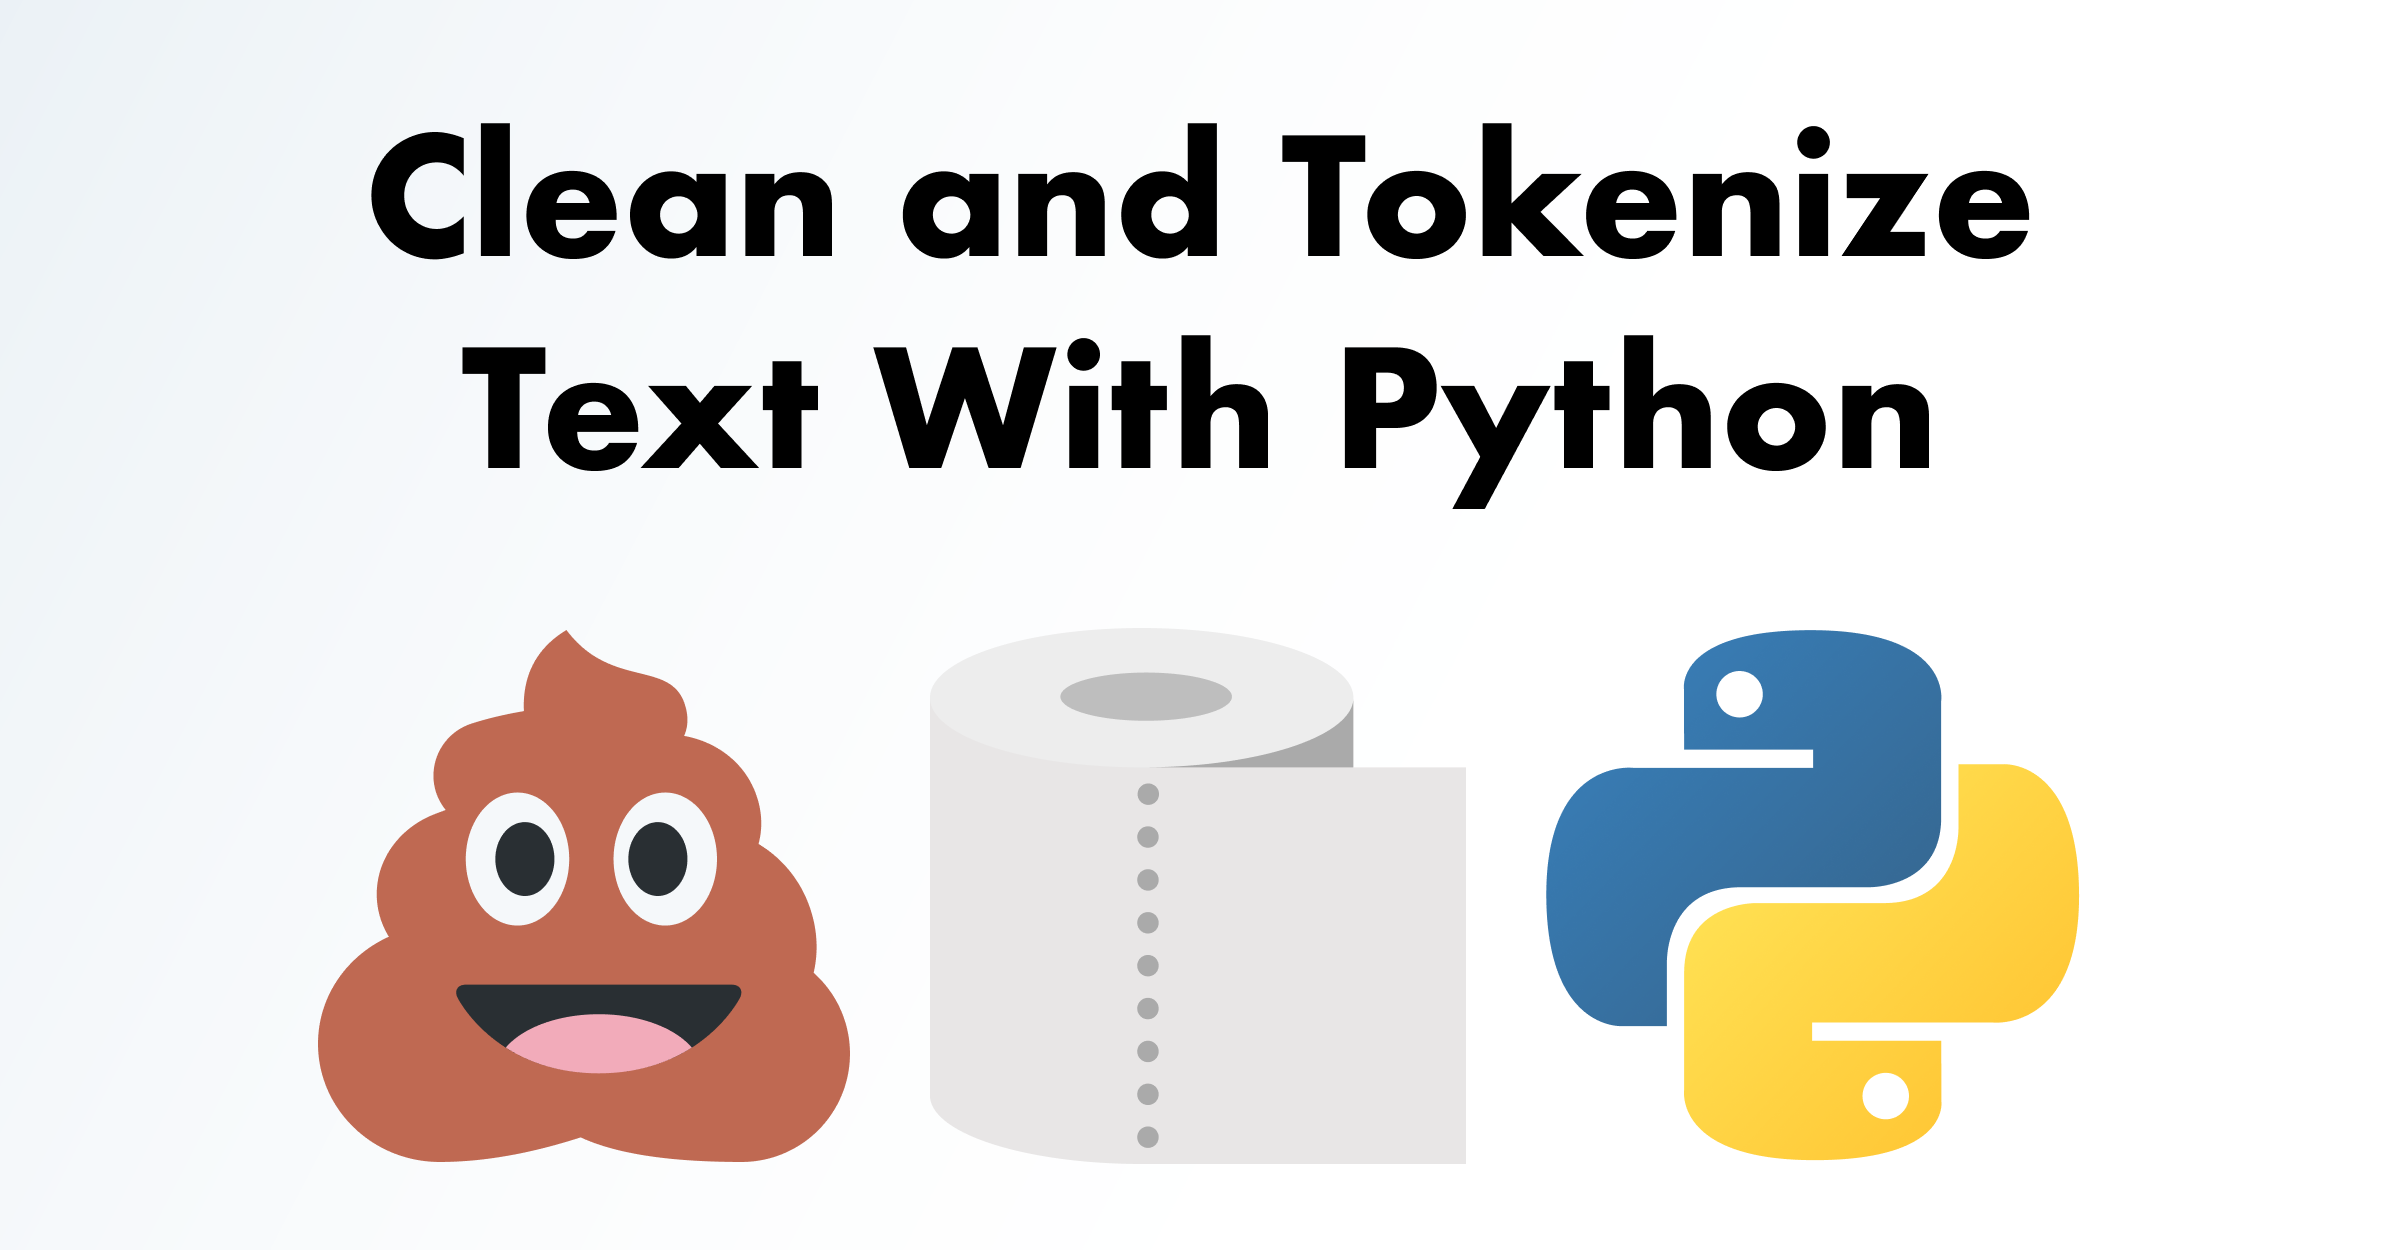

In [ ]:
from nltk.corpus import stopwords
import string
import nltk


nltk.download('stopwords')


print(stopwords.words('english'))
print(len(stopwords.words('english')))
print(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
# lista di token da eliminare

custom_list = ["'s","n't","''","``", "It", "This", "I"]

stop_list = stopwords.words('english') + list(string.punctuation) + custom_list

tokens_no_stop = [token for token in all_tokens
                        if token not in stop_list]

In [ ]:
# see if anything has improved
total_term_frequency_no_stop = Counter(tokens_no_stop)

for word, freq in total_term_frequency_no_stop.most_common(20):
    print("{}\t{}".format(word, freq))

book	9892
The	9502
one	6540
like	5267
would	4791
good	4336
...	4192
great	3888
get	3519
read	3357
time	3264
really	2893
movie	2883
much	2553
could	2390
first	2364
even	2361
well	2326
product	2069
If	2045


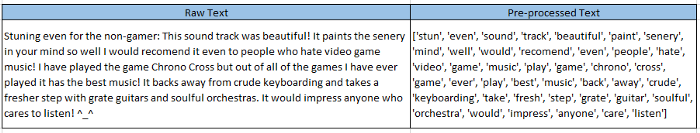

In [ ]:
#Esempi:
#lowercasing
#stemming
#American-to-British mapping

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
all_tokens_lower_tokens_no_stop = [t.lower() for t in tokens_no_stop]

tokens_normalised = [stemmer.stem(t) for t in all_tokens_lower_tokens_no_stop
                                     if t not in stop_list]

total_term_frequency_normalised = Counter(tokens_normalised)

for word, freq in total_term_frequency_normalised.most_common(20):
    print("{}\t{}".format(word, freq))

book	11547
one	7385
like	6244
would	4972
read	4870
get	4781
good	4724
use	4629
great	4417
time	4375
...	4192
work	3810
love	3531
movi	3502
realli	3058
make	2990
buy	2776
even	2729
well	2669
much	2655


In [ ]:
from nltk import ngrams

phrases = Counter(ngrams(all_tokens_lower, 2))
for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('.', 'i')	16231
('of', 'the')	7767
('.', 'the')	7763
(',', 'and')	6384
('.', 'it')	5781
(',', 'but')	5684
('.', 'this')	5396
('this', 'book')	4631
('in', 'the')	4574
('!', '!')	4332
(',', 'i')	4077
('is', 'a')	3839
('it', 'is')	3775
('it', "'s")	3635
('this', 'is')	3570
('i', 'have')	3152
('if', 'you')	3038
('and', 'the')	3004
(',', 'the')	2830
('do', "n't")	2791


In [ ]:
phrases = Counter(ngrams(tokens_normalised, 2))

for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('read', 'book')	673
('would', 'recommend')	456
('wast', 'money')	412
('year', 'old')	412
('highli', 'recommend')	389
('year', 'ago')	300
('much', 'better')	296
('one', 'best')	280
('look', 'like')	268
('wast', 'time')	262
('recommend', 'book')	261
('...', '...')	261
('even', 'though')	249
('work', 'well')	248
('sound', 'like')	247
('book', 'read')	246
('work', 'great')	233
('first', 'time')	228
('save', 'money')	211
('feel', 'like')	209


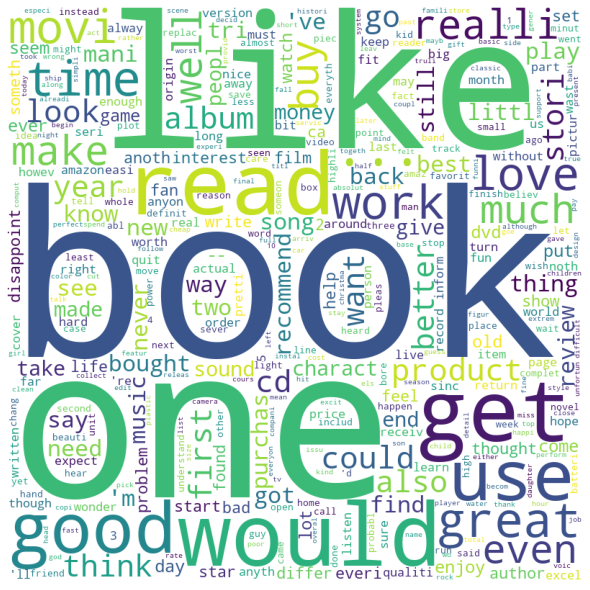

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=1000,
                relative_scaling=0.21,
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(total_term_frequency_normalised)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [ ]:
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)

In [ ]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]

Corpus['text'] = [token for token in Corpus['text'] if token not in stop_list]

stemmer = PorterStemmer()

Corpus['text'] = [stemmer.stem(t) for t in Corpus['text'] if t not in stop_list]


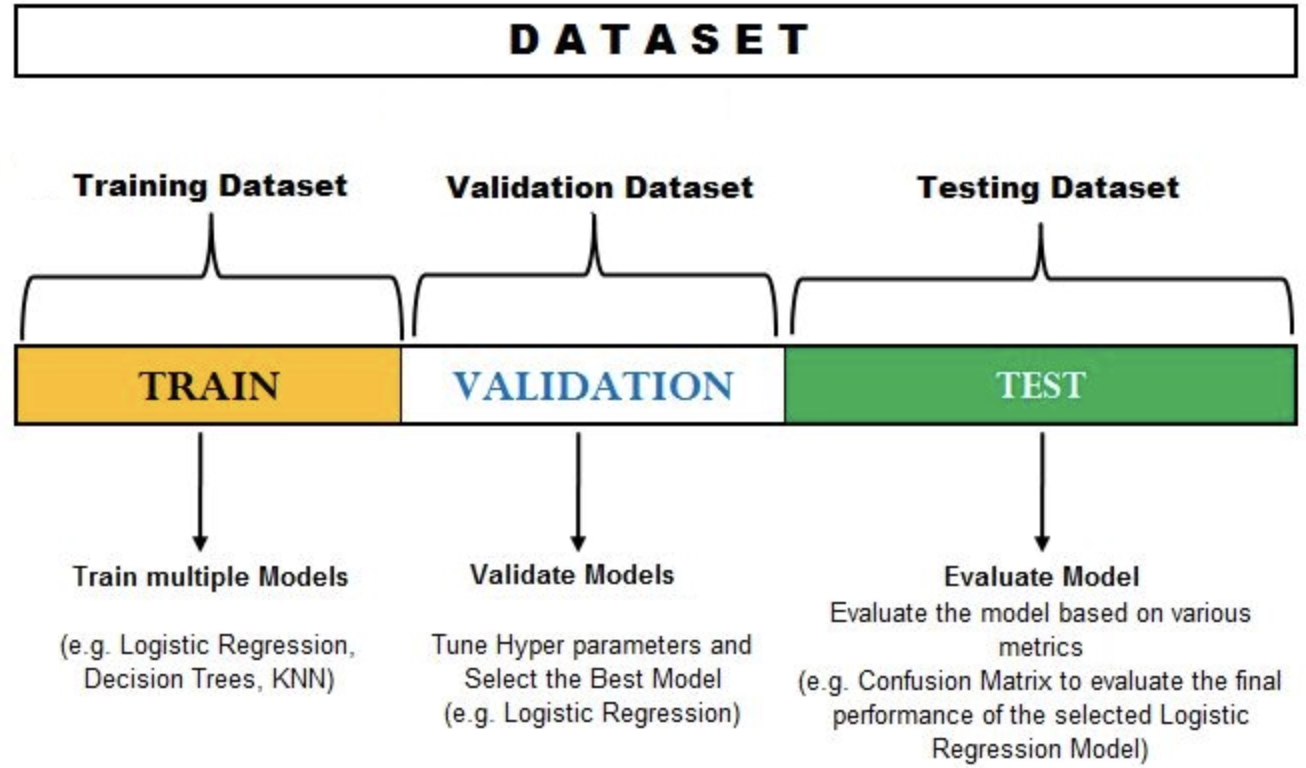

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text'],Corpus['label'],test_size=0.3, random_state=500)

## Word Vectorization
It's process of turning a collection of text documents into numerical feature vectors. There are many methods to convert text data to vectors which the model can understand.
Today we use “Term Frequency — Inverse Document” **TF-IDF**.


*   **Frequency** which are the components of the resulting scores assigned to each word.

*   **Term Frequency:** summarizes how often a given word appears within a document.

*  **Inverse Document Frequency**  down scales words that appear a lot across documents.


**TF-IDF** are word frequency scores that try to highlight words that are more "interesting".

This will help TF-IDF build a vocabulary of words which it has learned from the corpus data and it will assign a unique integer number to each of these words. 

Their will be maximum of 5000 unique words/features as we have set parameter **max_features=5000**.


Finally we will transform Train_X and Test_X to vectorized Train_X_Tfidf and Test_X_Tfidf. These will now contain for each row a list of unique integer number and its associated importance as calculated by TF-IDF.




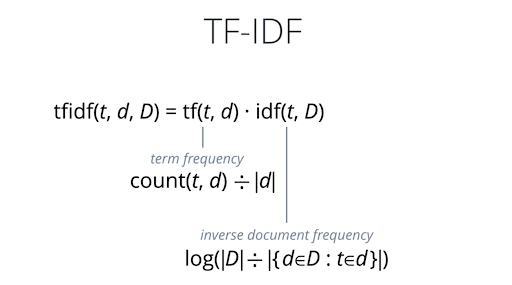

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)



In [ ]:
Train_Y

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Tfidf_vect.vocabulary_)

{'much': 2892, 'about': 79, 'nothing': 2986, 'repetitive': 3657, 'self': 3875, 'serving': 3905, 'and': 232, 'generally': 1884, 'not': 2980, 'helpful': 2089, 'golf': 1929, 'is': 2337, 'trial': 4611, 'error': 1525, 'there': 4472, 'are': 289, 'technical': 4410, 'skills': 4024, 'that': 4454, 'must': 2903, 'be': 417, 'developed': 1227, 'the': 4456, 'feel': 1677, 'good': 1932, 'approach': 286, 'does': 1317, 'little': 2603, 'for': 1783, 'improvement': 2229, 'hi': 2102, 'from': 1837, 'germany': 1896, 'stars': 4185, 'because': 429, 'really': 3553, 'fast': 1654, 'shipping': 3952, 'top': 4559, 'item': 2347, 'in': 2230, 'every': 1549, 'way': 4835, 'hot': 2157, 'perfect': 3182, 'only': 3043, 'one': 3040, 'bad': 379, 'thing': 4481, 'last': 2485, 'season': 3850, 'take': 4371, 'this': 4487, 'day': 1139, 'have': 2053, 'seen': 3869, 'effects': 1443, 'my': 2904, 'body': 527, 'especially': 1529, 'better': 470, 'almost': 200, 'two': 4650, 'years': 4978, 'ago': 171, 'was': 4818, 'sent': 3887, 'cd': 723, 'mo

## Use the ML Algorithms to Predict the outcome

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)


# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  81.56666666666666


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.15
